In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import torch
import os 

print("Libraries loaded sucessfully")



Libraries loaded sucessfully


In [12]:
def create_moving_circle_video(num_frames=50, img_size=32, circle_radius=3):
    """
    Generate a video of single cirle moving with physics.

    Args:
        num_frames: Number of frames to generate
        img_size: size of the square image(img_size x img_size)
        circle_radius: radius of the circle in pixels

    Returns:
        frames: numpy array of shape (num_frames, img_size, img_size)
        positions: list of (x, y) positions for each frame 

    """
    frames = []
    positions = []

    x = np.random.uniform(circle_radius + 5, img_size - circle_radius - 5)
    y = np.random.uniform(circle_radius + 5, img_size - circle_radius - 5)

    vx = np.random.uniform(-1.5, 1.5)
    vy = np.random.uniform(-1.5, 1.5)

    for i in range(num_frames):
        frame = np.zeros((img_size, img_size))

        Y, X = np.ogrid[:img_size, :img_size]
        dist_from_center = np.sqrt((X - x)**2 + (Y-y)**2)
        circle_mask = dist_from_center <= circle_radius 
        frame[circle_mask] = 1.0

        frames.append(frame)
        positions.append((x, y))

        x += vx
        y += vy

        if x - circle_radius <= 0 or x + circle_radius >= img_size:
            vx = -vx
            x = np.clip(x, circle_radius, img_size - circle_radius)
        if y - circle_radius <= 0 or y + circle_radius >= img_size:
            vy = -vy
            y = np.clip(y, circle_radius, img_size - circle_radius)

    return np.array(frames), positions

print("Generating test video...")
test_video, test_positions = create_moving_circle_video(num_frames=50)
print(f"✓ Video shape: {test_video.shape}")
print(f"✓ Generated {len(test_positions)} frames")
print(f"✓ First position: {test_positions[0]}")
print(f"✓ Last position: {test_positions[-1]}")
        

        

Generating test video...
✓ Video shape: (50, 32, 32)
✓ Generated 50 frames
✓ First position: (13.656684767842934, 11.096564631530752)
✓ Last position: (np.float64(25.214924163255755), np.float64(27.204782293729828))


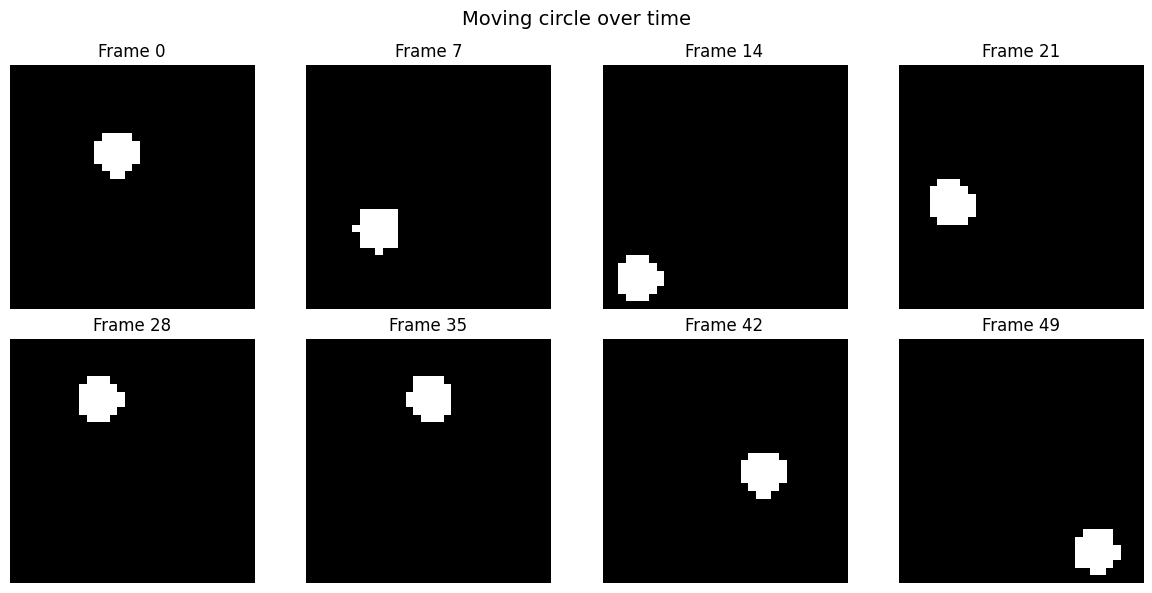

You should see the circle moving across frames!


In [13]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
frame_indices = [0, 7, 14, 21 , 28, 35, 42, 49]

for idx, frame_num in enumerate(frame_indices):
    row = idx // 4
    col = idx % 4 
    axes[row, col].imshow(test_video[frame_num], cmap='grey')
    axes[row, col].set_title(f'Frame {frame_num}')
    axes[row, col].axis('off')

plt.suptitle('Moving circle over time', fontsize=14)
plt.tight_layout()
plt.show()

print("You should see the circle moving across frames!")


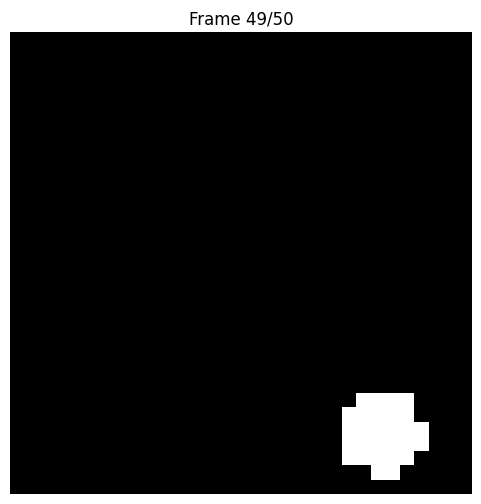

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(test_video[0], cmap='gray', vmin=0, vmax=1)
ax.set_title('Moving Circle Animation')
ax.axis('off')

def update_frame(frame_num):
    im.set_array(test_video[frame_num])
    ax.set_title(f'Frame {frame_num}/{len(test_video)}')
    return [im]

anim = animation.FuncAnimation(
    fig,
    update_frame,
    frames=len(test_video),
    interval=100, #100ms between friends
    blit=True,
    repeat=True
)

HTML(anim.to_jshtml())
    

In [16]:
print("Generating full dataset...")
print("This will take ~2 minutes...")

num_videos = 1000
all_videos = []
all_positions = []

for i in range(num_videos):
    video, positions = create_moving_circle_video(num_frames=50)
    all_videos.append(video)
    all_positions.append(positions)

    if (i + 1) % 100 == 0:
        print(f"Generated {i + 1}/{num_videos} videos")

all_videos = np.array(all_videos)
print(f"\n✓ Complete! Dataset shape: {all_videos.shape}")
print(f" - {all_videos.shape[0]} videos")
print(f" - {all_videos.shape[1]} frames per video")
print(f" - {all_videos.shape[2]}x{all_videos.shape[3]} pixel frames")
    
    
    

Generating full dataset...
This will take ~2 minutes...
Generated 100/1000 videos
Generated 200/1000 videos
Generated 300/1000 videos
Generated 400/1000 videos
Generated 500/1000 videos
Generated 600/1000 videos
Generated 700/1000 videos
Generated 800/1000 videos
Generated 900/1000 videos
Generated 1000/1000 videos

✓ Complete! Dataset shape: (1000, 50, 32, 32)
 - 1000 videos
 - 50 frames per video
 - 32x32 pixel frames


In [20]:
save_path = '../data/synthetic_tracking_dataset.npz'

print(f"Saving dataset to {save_path}...")
np.savez_compressed(
    save_path,
    videos=all_videos,
    positions=all_positions
      )
print("✓ Dataset saved!")

file_size_mb = os.path.getsize(save_path) / (1024 * 1024)
print(f"✓ File size: {file_size_mb:.2f} MB")

Saving dataset to ../data/synthetic_tracking_dataset.npz...
✓ Dataset saved!
✓ File size: 1.69 MB


✓ Loaded 1000 videos


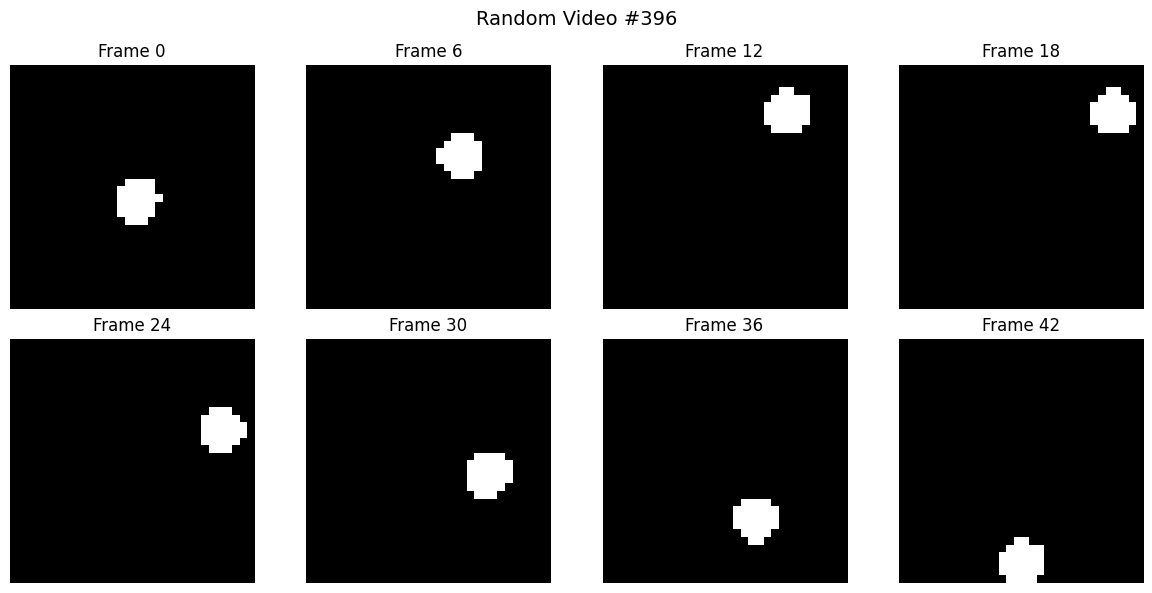

In [23]:
loaded_data = np.load(save_path, allow_pickle=True)
loaded_videos = loaded_data['videos']
loaded_positions = loaded_data['positions']

print(f"✓ Loaded {len(loaded_videos)} videos")

random_idx = np.random.randint(0, len(loaded_videos))
random_video = loaded_videos[random_idx]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for idx in range(8):
    frame_num = idx * 6
    row = idx // 4 
    col = idx % 4
    axes[row, col].imshow(random_video[frame_num], cmap='grey')
    axes[row, col].set_title(f'Frame {frame_num}')
    axes[row, col].axis('off')

plt.suptitle(f'Random Video #{random_idx}', fontsize=14)
plt.tight_layout()
plt.show()

